In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airbnb_Open_Data.csv')

In [3]:
df

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [5]:
df['price'].dropna(inplace=True)

In [6]:
df['price']=df['price'].str.extract(r'([0-9]+)').astype('float')
df['service_fee']=df['service fee'].str.extract(r'([0-9]+)').astype('float')

In [7]:
df.drop_duplicates(subset=['id'], inplace=True)

In [8]:
df.dropna(subset=['host name','price'], inplace=True)

In [9]:
df[df['house_rules'].str.contains('none', case=False, na=False)]['house_rules']

1548     Hello there! Please only enter the front door ...
1574     Hello there! Please only enter the front door ...
1903     ** No open flames [except kitchen gas stove an...
5130     Hello there! Please only enter the front door ...
5156     Hello there! Please only enter the front door ...
                               ...                        
93492    ** No open flames [except kitchen gas stove an...
96719    Hello there! Please only enter the front door ...
96745    Hello there! Please only enter the front door ...
97074    ** No open flames [except kitchen gas stove an...
99900    ** No open flames [except kitchen gas stove an...
Name: house_rules, Length: 63, dtype: object

In [10]:
host_mode_map = df.groupby('host name')['host_identity_verified'].agg(lambda x:
                                                                      x.mode().iloc[0] if not x.mode().empty else 'unconfirmed')

In [11]:
df['host_identity_verified'] = df['host name'].map(host_mode_map)

In [12]:
drop = ['id', 'host id', 'lat', 'long', 'country', 'country code', 'license']

In [13]:
df.drop(columns=drop, inplace=True)

In [14]:
df['neighbourhood group'].replace(to_replace=['manhatan','brookln'],value=['Manhattan','Brooklyn'],inplace=True)

In [15]:
def impute_neighbourhood_groups(row):
    if pd.isnull(row['neighbourhood group']):
        temp=row['neighbourhood']
        return df[df['neighbourhood']==temp]['neighbourhood group'].mode()[0]
    else:
        return row['neighbourhood group']
    
df['neighbourhood group']=df.apply(impute_neighbourhood_groups,axis=1)

In [16]:
df.instant_bookable.fillna(value='Unknown', inplace=True)

In [17]:
df['instant_bookable'] = df.instant_bookable.astype('str')

In [18]:
df['cancellation_policy'].fillna('unknown', inplace=True)

In [19]:
df['Construction year'].fillna(df['Construction year'].median(), inplace=True)

In [20]:
df['service_fee'].fillna(df['price']*0.15, inplace=True)

In [21]:
df['minimum nights'] = np.abs(df['minimum nights'])

In [22]:
df['minimum nights']=np.where(df['minimum nights']>10,10,df['minimum nights'])

In [23]:
df.groupby('room type')['minimum nights'].mean()

room type
Entire home/apt    4.456082
Hotel room         2.017699
Private room       3.374784
Shared room        3.148791
Name: minimum nights, dtype: float64

In [24]:
def impute_min_nights(row):
    if pd.isnull(row['minimum nights']):
        if row['room type']=='Entire home/apt':
            return 4
        elif row['room type']=='Hotel room':
            return 2
        else:
            return 3
    else:
        return row['minimum nights']

df['minimum nights']=df.apply(impute_min_nights,axis=1)

In [25]:
df['number of reviews'].fillna(round(df['number of reviews'].mean()),inplace=True)

In [26]:
from datetime import *

In [27]:
df['last review'] = pd.to_datetime(df['last review'], format='%m/%d/%Y')
df['days_since_last_review'] = (datetime.now() - df['last review']).dt.days

In [28]:
df['reviews per month'] = np.where(df['number of reviews']==0, 0, df['reviews per month'])

In [29]:
df['age'] = 2024 - df['Construction year']

In [30]:
df['reviews per month'].fillna(value=(df['number of reviews']/(df['age']*12)), inplace=True)

In [31]:
df['availability 365'] = df['availability 365'].apply(lambda x: np.abs(x) if x<0 else 365 if x>365 else x)

In [32]:
def impute_days(row):
    if row['days_since_last_review']>(row['age']*365):
        return row['age']*365 
    else:
        return row['days_since_last_review']

df['days_since_last_review'] = df.apply(impute_days,axis=1)

In [33]:
q1, q3 = df['days_since_last_review'].quantile(0.25), df['days_since_last_review'].quantile(0.75)
iqr = q3-q1
ll = q1 - (1.5*iqr)
ul = q3 + (1.5*iqr)
df['days_since_last_review'] = df['days_since_last_review'].apply(lambda x: ll if x<=500 else x)
df['days_since_last_review'].fillna(ul, inplace=True)

In [34]:
from random import *
import random

In [35]:
def impute_review_rate_num(row):
    if pd.isnull(row['review rate number']):
        return random.choice([3.0,4.0,5.0])
    else:
        return row['review rate number']

df['review rate number']=df.apply(impute_review_rate_num,axis=1)

In [36]:
df['calculated host listings count'].fillna(df['calculated host listings count'].median(), inplace=True)
df['availability 365'].fillna(df['availability 365'].median(), inplace=True)

In [37]:
df['rules'] = np.where(df['house_rules'].isnull(), 0, 1)

In [38]:
df.isnull().sum()

NAME                                241
host_identity_verified                0
host name                             0
neighbourhood group                   0
neighbourhood                        15
instant_bookable                      0
cancellation_policy                   0
room type                             0
Construction year                     0
price                                 0
service fee                         239
minimum nights                        0
number of reviews                     0
last review                       15728
reviews per month                     0
review rate number                    0
calculated host listings count        0
availability 365                      0
house_rules                       51552
service_fee                           0
days_since_last_review                0
age                                   0
rules                                 0
dtype: int64

In [39]:
df1 = df[df['price']>49]

In [40]:
df1.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'service_fee',
       'days_since_last_review', 'age', 'rules'],
      dtype='object')

In [41]:
drop = ['neighbourhood', 'host name', 'Construction year', 'last review', 'house_rules', 'service fee']
df1.drop(columns=drop, inplace=True)

In [42]:
df1.shape

(83669, 17)

In [43]:
df1['NAME'].fillna('NA',inplace=True)

In [44]:
import re

In [45]:
def add_space(text):
    t=(re.sub(r'(\d+)([a-zA-Z]+)', r'\1 \2',text)).lower()
    return re.sub(r'#(\d+)', r'# \1',t)

df1['processed_text'] = df1['NAME'].apply(add_space)

In [46]:
def extract_bedrooms(row):
        text=row['processed_text'].lower()
        text=text.replace('*','')
        text=text.replace('one','1')
        text=text.replace('two','2')
        text=text.replace('three','3')
        text=text.replace('four','4')
        text=text.replace('five','5')
    #text = text.lower()
    # Regex pattern to capture different bedroom notations
        #pattern = r'\b(\d+(\.\d+)?)\s*(?:br|bedroom|bdrm|bdr|bd|rm|brm|room|bed|b/room)\b'
        #pattern = r'\b(\d+(\.\d+)?)[-\s]*(?:br|bedroom|bdrm|bdr|bd|rm|brm|room|bed|b/room|bedrm)\b'
        pattern = r'\b(\d+(\.\d+)?)[\s-]*(?:\w+\s)?(?:br|bedroom|bdrm|bdr|bd|rm|brm|room|bed|b/room|b|bedrm)s?\b'

        match = re.search(pattern, text)
        if match:
            return float(match.group(1))
        else:
            return 0  # Return 0 if no bedrooms are mentioned

df1['bedrooms']=df1.apply(extract_bedrooms,axis=1)

In [47]:
def find_bedrooms(row):
    if row['bedrooms']==0:
        text=row['processed_text']
        if ('#' in text) or ('studio' in text) or ('room' in text.split()) or ('private' in text.split()) or ('home' in text.split()):
            return 1
        else:
            return 0
    else:
        return row['bedrooms']
    
df1['bedrooms'] = df1.apply(find_bedrooms,axis=1)

In [48]:
def impute_rem_bedrooms(row):
    if row['bedrooms']==0:
        if row['room type']=='Entire home/apt':
            return random.choice([2.0,3.0])
        else:
            return 1
    else:
        return row['bedrooms']
    
df1['bedrooms'] = df1.apply(impute_rem_bedrooms,axis=1)

In [49]:
bedrooms_above_15=df1[df1['bedrooms']>15].index

df1.drop(bedrooms_above_15,inplace=True)

In [50]:
df1[df1['bedrooms']==0].shape,df1[df1['bedrooms']==1].shape,df1[df1['bedrooms']==2].shape,df1[df1['bedrooms']==3].shape,df1[df1['bedrooms']>3].shape

((0, 19), (56230, 19), (15630, 19), (10967, 19), (668, 19))

In [51]:
def impute_room_groups(row):
    if row['bedrooms']==1:
        return 1
    elif (row['bedrooms']>1) & (row['bedrooms']<=2):
        return 2
    elif (row['bedrooms']>2) & (row['bedrooms']<=3):
        return 3
    elif (row['bedrooms']>3) & (row['bedrooms']<=4):
        return 4
    else:
        return 5

df1['room_groups']=df1.apply(impute_room_groups,axis=1)

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83600 entries, 0 to 102056
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME                            83600 non-null  object 
 1   host_identity_verified          83600 non-null  object 
 2   neighbourhood group             83600 non-null  object 
 3   instant_bookable                83600 non-null  object 
 4   cancellation_policy             83600 non-null  object 
 5   room type                       83600 non-null  object 
 6   price                           83600 non-null  float64
 7   minimum nights                  83600 non-null  float64
 8   number of reviews               83600 non-null  float64
 9   reviews per month               83600 non-null  float64
 10  review rate number              83600 non-null  float64
 11  calculated host listings count  83600 non-null  float64
 12  availability 365                8360

In [53]:
df1.drop(columns=['NAME', 'bedrooms', 'processed_text'], inplace=True)

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
cat = df1.select_dtypes(include='object').columns.to_list()
df1 = pd.get_dummies(df1, columns=cat, drop_first=True, dtype=int)

In [56]:
df1

,price,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,service_fee,days_since_last_review,age,...,neighbourhood group_Queens,neighbourhood group_Staten Island,instant_bookable_True,instant_bookable_Unknown,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_unknown,room type_Hotel room,room type_Private room,room type_Shared room
0,966.0,10.0,9.0,0.21,4.0,6.0,286.0,193.00,1057.0,4.0,...,0,0,0,0,0,1,0,0,1,0
1,142.0,10.0,45.0,0.38,4.0,2.0,228.0,28.00,843.0,17.0,...,0,0,0,0,1,0,0,0,0,0
2,620.0,3.0,0.0,0.00,5.0,1.0,352.0,124.00,3487.5,19.0,...,0,0,1,0,0,0,0,0,1,0
3,368.0,10.0,270.0,4.64,4.0,1.0,322.0,74.00,1894.0,19.0,...,0,0,1,0,1,0,0,0,0,0
4,204.0,10.0,9.0,0.10,3.0,1.0,289.0,41.00,2122.0,15.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102051,147.0,1.0,0.0,0.00,4.0,1.0,88.0,22.05,3487.5,12.0,...,0,0,1,0,1,0,0,0,1,0
102053,696.0,7.0,12.0,0.44,5.0,1.0,0.0,104.40,1994.0,12.0,...,0,0,1,0,1,0,0,0,1,0
102054,909.0,1.0,19.0,0.72,3.0,2.0,0.0,136.35,2567.0,12.0,...,0,0,0,0,0,0,0,0,1,0
102055,387.0,2.0,50.0,3.12,4.0,2.0,235.0,58.05,1903.0,12.0,...,0,0,1,0,1,0,0,0,0,0


In [144]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import *
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler

In [58]:
df1.isnull().sum()

price                                0
minimum nights                       0
number of reviews                    0
reviews per month                    0
review rate number                   0
calculated host listings count       0
availability 365                     0
service_fee                          0
days_since_last_review               0
age                                  0
rules                                0
room_groups                          0
host_identity_verified_verified      0
neighbourhood group_Brooklyn         0
neighbourhood group_Manhattan        0
neighbourhood group_Queens           0
neighbourhood group_Staten Island    0
instant_bookable_True                0
instant_bookable_Unknown             0
cancellation_policy_moderate         0
cancellation_policy_strict           0
cancellation_policy_unknown          0
room type_Hotel room                 0
room type_Private room               0
room type_Shared room                0
dtype: int64

In [59]:
y=df1['price']
x=df1.drop(['price', 'service_fee'], axis=1)
xc=sm.add_constant(x)
ols_model=sm.OLS(y,xc).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.541
Date:                Tue, 10 Sep 2024   Prob (F-statistic):             0.0470
Time:                        23:08:05   Log-Likelihood:            -5.8770e+05
No. Observations:               83600   AIC:                         1.175e+06
Df Residuals:                   83576   BIC:                         1.176e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               546.9696      8.078     67.715      0.000     531.138     562.802
minimum nights                       -0.3771      0.322     -1.172      0.241      -1.008       0.254
number of reviews                     0.0348      0.025      1.407      0.159      -0.014       0.083
reviews per month                    -1.0532      0.768     -1.372      0.170      -2.558       0.452
review rate number                    0.7849      0.739      1.062      0.288      -0.664       2.233
calculated host listings count       -0.0059      0.031     -0.190      0.849      -0.067       0.055
availability 365                     -0.0108      0.007     -1.469      0.142      -0.025       0.004
days_since_last_review               -0.0020      0.001     -1.506      0.132      -0.005       0.001
age                                   0.2544      0.169      1.501      0.133      -0.078       0.587
rules                                -3.2889      1.978     -1.663      0.096      -7.166       0.588
room_groups                          -4.8700      1.488     -3.273      0.001      -7.787      -1.953
host_identity_verified_verified      -1.7760      1.902     -0.934      0.350      -5.504       1.952
neighbourhood group_Brooklyn         -7.0674      6.008     -1.176      0.239     -18.842       4.708
neighbourhood group_Manhattan        -9.4018      6.023     -1.561      0.119     -21.208       2.404
neighbourhood group_Queens           -9.4271      6.373     -1.479      0.139     -21.918       3.064
neighbourhood group_Staten Island    -1.3558     11.340     -0.120      0.905     -23.581      20.870
instant_bookable_True                 1.1934      1.893      0.631      0.528      -2.516       4.903
instant_bookable_Unknown             -7.5885     57.092     -0.133      0.894    -119.489     104.312
cancellation_policy_moderate         -0.5587      2.317     -0.241      0.809      -5.100       3.982
cancellation_policy_strict           -1.5242      2.321     -0.657      0.511      -6.074       3.025
cancellation_policy_unknown          38.4675     67.418      0.571      0.568     -93.672     170.607
room type_Hotel room                 38.6510     28.181      1.372      0.170     -16.584      93.886
room type_Private room               -5.5437      2.327     -2.382      0.017     -10.105      -0.983
room type_Shared room                -2.2311      6.763     -0.330      0.741     -15.487      11.025
==============================================================================
Omnibus:                    66586.039   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4917.751
Skew:                          -0.001   Prob(JB):                         0.00
Kurtosis:    

In [145]:
vif=[]
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x, i))
    
pd.DataFrame(data=vif, index=x.columns, columns=['VIF']).sort_values(by='VIF', ascending=False)

,VIF
neighbourhood group_Manhattan,8.974911
neighbourhood group_Brooklyn,8.613598
days_since_last_review,8.552157
review rate number,6.861197
room_groups,6.016552
age,5.180945
instant_bookable_Unknown,3.530679
cancellation_policy_unknown,3.525130
neighbourhood group_Queens,3.392157
minimum nights,2.881586


In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [61]:
model_name=[]
trainr2score = []
testr2score=[]
train_mae=[]
train_mape=[]
test_mae=[]
test_mape=[]

def model_building(model,xtrain,ytrain,xtest):
    model.fit(xtrain,ytrain)
    test_prediction=model.predict(xtest)
    train_prediction=model.predict(xtrain)
    model_name.append(str(model))
    trainr2score.append(r2_score(ytrain, train_prediction))
    testr2score.append(r2_score(ytest,test_prediction))
    train_mae.append(mean_absolute_error(ytrain,train_prediction))
    test_mae.append(mean_absolute_error(ytest,test_prediction))
    train_mape.append(mean_absolute_percentage_error(ytrain,train_prediction))
    test_mape.append(mean_absolute_percentage_error(ytest,test_prediction))

In [62]:
model_building(LinearRegression(),xtrain,ytrain,xtest)
model_building(DecisionTreeRegressor(),xtrain,ytrain,xtest)
model_building(RandomForestRegressor(),xtrain,ytrain,xtest)
model_building(AdaBoostRegressor(),xtrain,ytrain,xtest)
model_building(BaggingRegressor(),xtrain,ytrain,xtest)
model_building(XGBRegressor(),xtrain,ytrain,xtest)
model_building(StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),('rf', RandomForestRegressor()),
                                            ('XGB', XGBRegressor()), ('Bag', BaggingRegressor())]), xtrain, ytrain, xtest)

In [63]:
reg1 = LinearRegression()
reg2 = RandomForestRegressor()
reg3 = XGBRegressor()
reg4 = BaggingRegressor()
model_building(VotingRegressor(estimators=[('lr', reg1), ('rf', reg2), ('xgb', reg3), ('bag', reg4)]),
              xtrain, ytrain, xtest)
table=pd.DataFrame({'model_name':model_name,'Train Mean Absolute Error':train_mae, 'Test Mean Absolute Error':test_mae,
                    'Train Mean Absolute Percentage Error':train_mape,'Test Mean Absolute Percentage Error':test_mape,
                    'train_R2':trainr2score, 'test_R2':testr2score})
table

,model_name,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Absolute Percentage Error,Test Mean Absolute Percentage Error,train_R2,test_R2
0,LinearRegression(),236.291149,236.351104,0.944315,0.929837,0.000639,-0.000540
1,DecisionTreeRegressor(),0.184074,221.382496,0.000773,0.766701,0.999462,-0.402461
2,RandomForestRegressor(),71.786086,192.717077,0.283330,0.752119,0.894430,0.255873
3,AdaBoostRegressor(),236.276850,236.249155,0.942049,0.927660,0.000664,-0.000147
4,BaggingRegressor(),77.979321,197.957709,0.294967,0.760046,0.849498,0.185294
5,"XGBRegressor(base_score=None, booster=None, ca...",205.339821,229.422298,0.813233,0.896752,0.219432,0.034158
6,"StackingRegressor(estimators=[('dt', DecisionT...",37.158302,180.637787,0.136324,0.698204,0.969379,0.283144
7,"VotingRegressor(estimators=[('lr', LinearRegre...",145.415193,211.831958,0.579707,0.830850,0.613666,0.167986


In [93]:
r=RandomForestRegressor()
r.fit(xtrain,ytrain)
t=pd.DataFrame({'columns':xtrain.columns,'importance':r.feature_importances_*100})
t

,columns,importance
0,minimum nights,6.623698
1,number of reviews,10.801998
2,reviews per month,14.240145
3,review rate number,5.718951
4,calculated host listings count,5.247608
5,availability 365,14.033160
6,days_since_last_review,13.137491
7,age,11.019682
8,rules,1.805804
9,room_groups,2.767937


In [65]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import *

In [87]:
for i in range(12,8,-1):
    rf = RandomForestRegressor(random_state=10)
    rfe = RFE(estimator=rf, n_features_to_select=i)
    rfe.fit(xtrain, ytrain)
    print("Feature ranking: ", rfe.ranking_)
    xtrainrfe = rfe.transform(xtrain)
    xtestrfe = rfe.transform(xtest)
    rf.fit(xtrainrfe,ytrain)
    train_pred=rf.predict(xtrainrfe)
    test_pred=rf.predict(xtestrfe)
    print(f"train r2 score for {i} features is {r2_score(ytrain,train_pred)}")
    print(f"test r2 score for {i} features is {r2_score(ytest,test_pred)}")

Feature ranking:  [ 1  1  1  1  1  1  1  1  5  1  1  1  3  7  9  4 11  1  6 12 10  2  8]
train r2 score for 12 features is 0.8969487953705993
test r2 score for 12 features is 0.29543418463156623
Feature ranking:  [ 1  1  1  1  1  1  1  1  6  1  1  1  4  8 10  5 12  2  7 13 11  3  9]
train r2 score for 11 features is 0.8977251900861218
test r2 score for 11 features is 0.311940698320494
Feature ranking:  [ 1  1  1  1  1  1  1  1  7  1  1  2  5  9 11  6 13  3  8 14 12  4 10]
train r2 score for 10 features is 0.8922064060636831
test r2 score for 10 features is 0.30081127192572554
Feature ranking:  [ 1  1  1  1  1  1  1  1  8  1  2  3  6 10 12  7 14  4  9 15 13  5 11]
train r2 score for 9 features is 0.8851720155698204
test r2 score for 9 features is 0.29435474651305926


In [88]:
rf = RandomForestRegressor(random_state=10)
rfe = RFE(estimator=rf, n_features_to_select=11)
rfe.fit(xtrain, ytrain)
print("Feature ranking: ", rfe.ranking_)
xtrainrfe = rfe.transform(xtrain)
xtestrfe = rfe.transform(xtest)
rf.fit(xtrainrfe,ytrain)

Feature ranking:  [ 1  1  1  1  1  1  1  1  6  1  1  1  4  8 10  5 12  2  7 13 11  3  9]


RandomForestRegressor(random_state=10)

In [117]:
print("Feature ranking: ", rfe.ranking_)

# Get the mask of selected features
selected_features_mask = rfe.support_

# Filter columns based on the selected features
xtrain_rfe = xtrain.loc[:, selected_features_mask]
xtest_rfe = xtest.loc[:, selected_features_mask]

# Create a final DataFrame with the selected features
final_xtrain = xtrain_rfe.copy()  # Training DataFrame with selected features
final_xtest = xtest_rfe.copy()     # Test DataFrame with selected features

Feature ranking:  [ 1  1  1  1  1  1  1  1  6  1  1  1  4  8 10  5 12  2  7 13 11  3  9]


In [118]:
final_xtest

,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,days_since_last_review,age,room_groups,host_identity_verified_verified,neighbourhood group_Brooklyn
73795,10.0,1.0,0.71,3.0,96.0,332.0,1932.0,21.0,1,1,0
81183,1.0,2.0,0.08,4.0,1.0,0.0,2626.0,18.0,3,0,1
6998,5.0,0.0,0.00,1.0,1.0,40.0,3487.5,21.0,3,0,0
21114,1.0,0.0,0.00,2.0,1.0,0.0,3487.5,3.0,1,0,0
14657,1.0,80.0,2.00,5.0,2.0,230.0,1897.0,14.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21206,3.0,0.0,0.00,1.0,1.0,0.0,3487.5,7.0,1,1,0
72450,1.0,19.0,0.41,5.0,1.0,0.0,730.0,2.0,1,0,1
27053,3.0,5.0,0.46,5.0,2.0,365.0,1941.0,16.0,1,1,0
92509,2.0,20.0,1.40,3.0,3.0,177.0,1825.0,5.0,1,1,1


In [120]:
# Define the model
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid
param_distributions = {
    'min_samples_split': [20000, 30000, 40000],
    'min_samples_leaf': [20000, 30000, 40000],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_distributions,
    n_iter=50,
    cv=3,
    verbose=3,
    random_state=10,
)

# Fit the model
random_search.fit(final_xtrain, ytrain)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END min_samples_leaf=20000, min_samples_split=20000;, score=-0.000 total time=   0.1s
[CV 2/3] END min_samples_leaf=20000, min_samples_split=20000;, score=-0.000 total time=   0.1s
[CV 3/3] END min_samples_leaf=20000, min_samples_split=20000;, score=-0.000 total time=   0.1s
[CV 1/3] END min_samples_leaf=20000, min_samples_split=30000;, score=-0.000 total time=   0.1s
[CV 2/3] END min_samples_leaf=20000, min_samples_split=30000;, score=-0.000 total time=   0.1s
[CV 3/3] END min_samples_leaf=20000, min_samples_split=30000;, score=-0.000 total time=   0.1s
[CV 1/3] END min_samples_leaf=20000, min_samples_split=40000;, score=-0.000 total time=   0.1s
[CV 2/3] END min_samples_leaf=20000, min_samples_split=40000;, score=-0.000 total time=   0.1s
[CV 3/3] END min_samples_leaf=20000, min_samples_split=40000;, score=-0.000 total time=   0.1s
[CV 1/3] END min_samples_leaf=30000, min_samples_split=20000;, score=-0.000 total tim

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'min_samples_leaf': [20000, 30000,
                                                             40000],
                                        'min_samples_split': [20000, 30000,
                                                              40000]},
                   random_state=10, verbose=3)

In [121]:
# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best R^2 Score on CV data:", random_search.best_score_)

Best Parameters: {'min_samples_split': 40000, 'min_samples_leaf': 20000}
Best R^2 Score on CV data: -0.00011246842140451759


In [123]:
model_building(DecisionTreeRegressor(),final_xtrain,ytrain,final_xtest)
model_building(RandomForestRegressor(),final_xtrain,ytrain,final_xtest)
model_building(BaggingRegressor(),final_xtrain,ytrain,final_xtest)
model_building(XGBRegressor(),final_xtrain,ytrain,final_xtest)
model_building(StackingRegressor(estimators=[('dt', DecisionTreeRegressor()),('rf', RandomForestRegressor()),
                                            ('XGB', XGBRegressor()), ('Bag', BaggingRegressor())]), final_xtrain, ytrain, final_xtest)
reg1 = LinearRegression()
reg2 = RandomForestRegressor()
reg3 = XGBRegressor()
reg4 = BaggingRegressor()
model_building(VotingRegressor(estimators=[('lr', reg1), ('rf', reg2), ('xgb', reg3), ('bag', reg4)]),
              final_xtrain, ytrain, final_xtest)
table=pd.DataFrame({'model_name':model_name,'Train Mean Absolute Error':train_mae, 'Test Mean Absolute Error':test_mae,
                    'Train Mean Absolute Percentage Error':train_mape,'Test Mean Absolute Percentage Error':test_mape,
                    'train_R2':trainr2score, 'test_R2':testr2score})
table

,model_name,Train Mean Absolute Error,Test Mean Absolute Error,Train Mean Absolute Percentage Error,Test Mean Absolute Percentage Error,train_R2,test_R2
0,LinearRegression(),236.291149,236.351104,0.944315,0.929837,0.000639,-0.000540
1,DecisionTreeRegressor(),0.184074,221.382496,0.000773,0.766701,0.999462,-0.402461
2,RandomForestRegressor(),71.786086,192.717077,0.283330,0.752119,0.894430,0.255873
3,AdaBoostRegressor(),236.276850,236.249155,0.942049,0.927660,0.000664,-0.000147
4,BaggingRegressor(),77.979321,197.957709,0.294967,0.760046,0.849498,0.185294
5,"XGBRegressor(base_score=None, booster=None, ca...",205.339821,229.422298,0.813233,0.896752,0.219432,0.034158
6,"StackingRegressor(estimators=[('dt', DecisionT...",37.158302,180.637787,0.136324,0.698204,0.969379,0.283144
7,"VotingRegressor(estimators=[('lr', LinearRegre...",145.415193,211.831958,0.579707,0.830850,0.613666,0.167986
8,DecisionTreeRegressor(),0.184074,222.542344,0.000773,0.772411,0.999462,-0.411331
9,DecisionTreeRegressor(),2.378825,198.185703,0.009023,0.691070,0.992321,-0.263103


In [142]:
# Define base models (Random Forest and Bagging Regressor)
random_forest = RandomForestRegressor(random_state=10)
bagging = BaggingRegressor(random_state=10)

# Define meta-model (XGBoost Regressor)
meta_model = RidgeCV()

# Create the stacking regressor
stacking_model = StackingRegressor(
    estimators=[
        ('random_forest', random_forest),
        ('bagging', bagging)
    ],
    n_jobs=-1  # Use all available processors
)

# Fit the stacking model without cross-validation
stacking_model.fit(final_xtrain, ytrain)

# Make predictions on the training set
y_train_pred = stacking_model.predict(final_xtrain)

# Make predictions on the test set
y_test_pred = stacking_model.predict(final_xtest)

train_mape = np.mean(np.abs((ytrain - y_train_pred) / ytrain)) * 100
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_r2 = r2_score(ytrain, y_train_pred)

# Calculate performance metrics for the test set
test_mape = np.mean(np.abs((ytest - y_test_pred) / ytest)) * 100
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_r2 = r2_score(ytest, y_test_pred)

# Print performance metrics
print(f"Training MAPE: {train_mape:.4f}%")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R²: {train_r2:.4f}")

print(f"Testing MAPE: {test_mape:.4f}%")
print(f"Testing RMSE: {test_rmse:.4f}")
print(f"Testing R²: {test_r2:.4f}")

Training MAPE: 19.2399%
Training RMSE: 69.6280
Training R²: 0.9352
Testing MAPE: 66.1423%
Testing RMSE: 225.4809
Testing R²: 0.3194


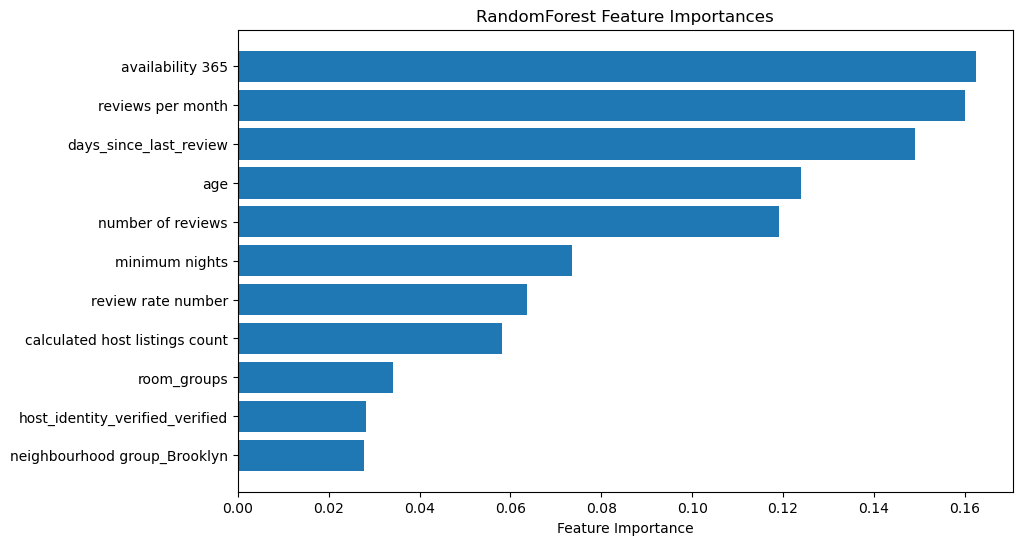

In [128]:
# Fit base models separately (if not already fitted)
random_forest.fit(final_xtrain, ytrain)
bagging.fit(final_xtrain, ytrain)

# Feature importances for RandomForest
rf_feature_importances = random_forest.feature_importances_
sorted_indices_rf = rf_feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices_rf)), rf_feature_importances[sorted_indices_rf], align='center')
plt.yticks(range(len(sorted_indices_rf)), final_xtrain.columns[sorted_indices_rf])
plt.xlabel('Feature Importance')
plt.title('RandomForest Feature Importances')
plt.show()

# Note: Bagging does not have feature importances directly; this is included for completeness
# Use permutation importance if needed, or refer to base models’ documentation

In [143]:
# Fit base models separately (if not already fitted)
random_forest.fit(final_xtrain, ytrain)

# Feature importances for RandomForest
rf_feature_importances = random_forest.feature_importances_
sorted_indices_rf = rf_feature_importances.argsort()

# Display feature importances
print("Feature Importances for RandomForest:")
for index in sorted_indices_rf:
    print(f"{final_xtrain.columns[index]}: {rf_feature_importances[index]:.4f}")

Feature Importances for RandomForest:
neighbourhood group_Brooklyn: 0.0277
host_identity_verified_verified: 0.0282
room_groups: 0.0342
calculated host listings count: 0.0582
review rate number: 0.0636
minimum nights: 0.0736
number of reviews: 0.1190
age: 0.1239
days_since_last_review: 0.1491
reviews per month: 0.1601
availability 365: 0.1624


In [136]:
from sklearn.linear_model import RidgeCV

# Access the final estimator (RidgeCV) from the stacking model
meta_model = stacking_model.final_estimator_

# RidgeCV does not provide feature importances, but you can check its coefficients
print("Meta-Model (RidgeCV) Coefficients:")
print(meta_model.coef_)

# Note: RidgeCV coefficients indicate the importance of each base model in the final prediction

Meta-Model (RidgeCV) Coefficients:
[1.13322817 0.01103373]


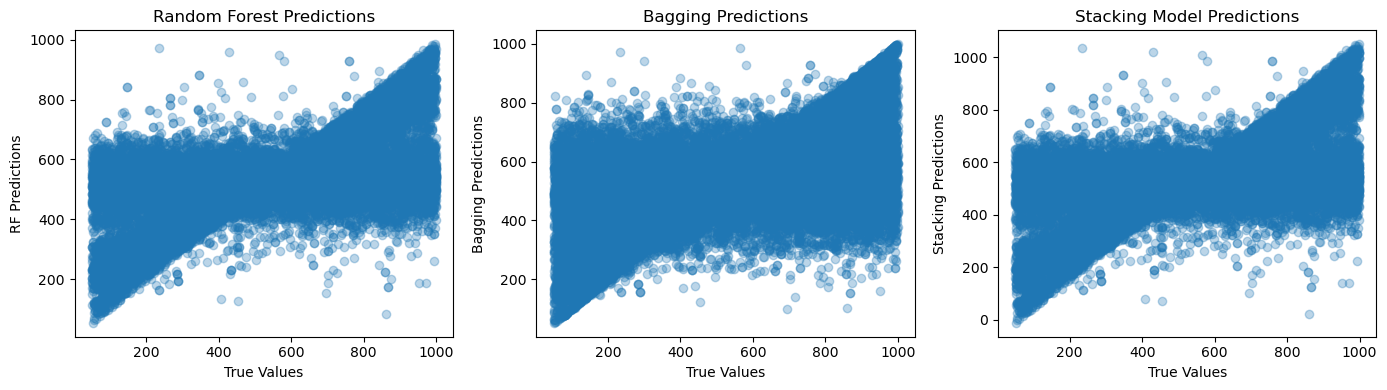

In [139]:
# Predictions from base models
rf_predictions = random_forest.predict(final_xtest)
bagging_predictions = bagging.predict(final_xtest)

# Make predictions from stacking model
stacking_predictions = stacking_model.predict(final_xtest)

# Plot comparisons
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.scatter(ytest, rf_predictions, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('RF Predictions')
plt.title('Random Forest Predictions')

plt.subplot(1, 3, 2)
plt.scatter(ytest, bagging_predictions, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Bagging Predictions')
plt.title('Bagging Predictions')

plt.subplot(1, 3, 3)
plt.scatter(ytest, stacking_predictions, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Stacking Predictions')
plt.title('Stacking Model Predictions')

plt.tight_layout()
plt.show()

In [66]:
df.columns

Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'service_fee',
       'days_since_last_review', 'age', 'rules'],
      dtype='object')

In [67]:
dropcol = ['NAME', 'host name', 'neighbourhood', 'house_rules', 'service fee', 'last review']
df2 = df.drop(columns=dropcol)

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101412 entries, 0 to 102057
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          101412 non-null  object 
 1   neighbourhood group             101412 non-null  object 
 2   instant_bookable                101412 non-null  object 
 3   cancellation_policy             101412 non-null  object 
 4   room type                       101412 non-null  object 
 5   Construction year               101412 non-null  float64
 6   price                           101412 non-null  float64
 7   minimum nights                  101412 non-null  float64
 8   number of reviews               101412 non-null  float64
 9   reviews per month               101412 non-null  float64
 10  review rate number              101412 non-null  float64
 11  calculated host listings count  101412 non-null  float64
 12  availability 365     

In [69]:
cat = ['host_identity_verified', 'neighbourhood group', 'instant_bookable', 'cancellation_policy', 'room type',
       'review rate number', 'rules']
num = ['minimum nights', 'number of reviews', 'reviews per month', 'calculated host listings count', 'availability 365',
      'service_fee', 'days_since_last_review', 'age']

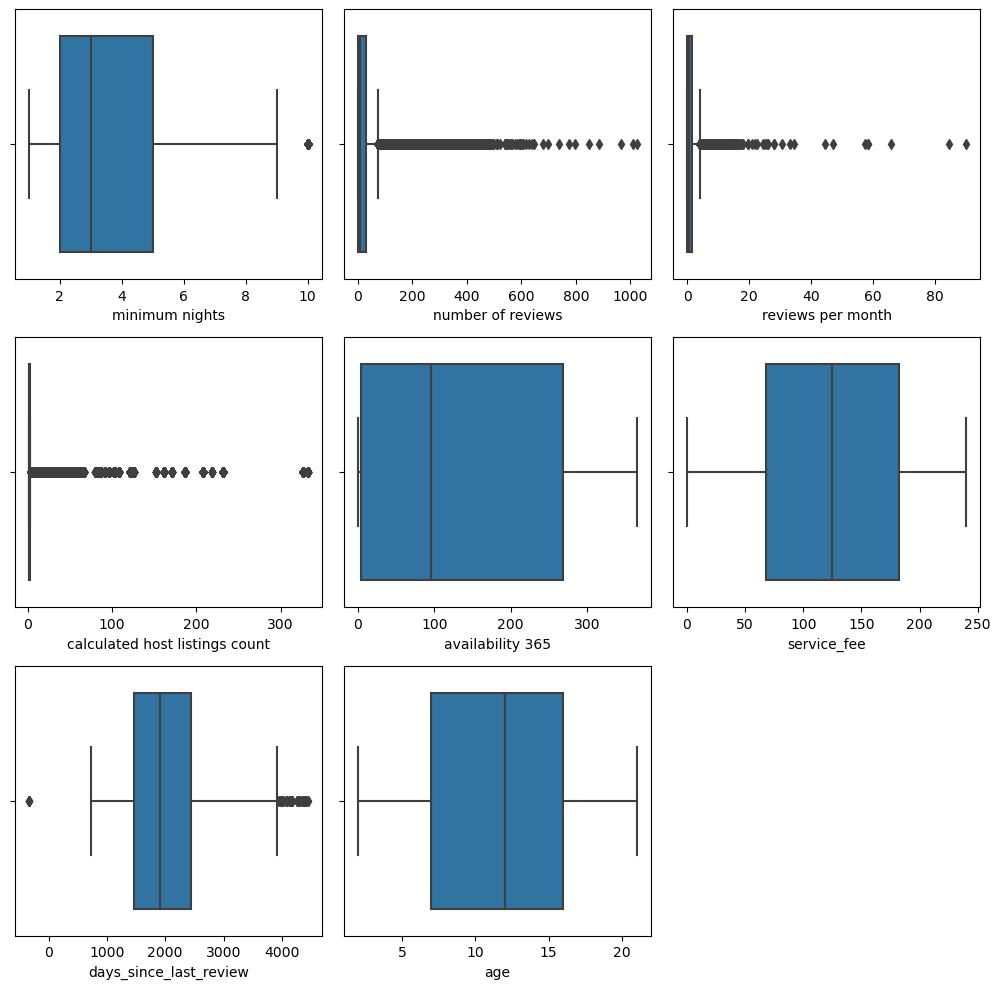

In [70]:
plt.figure(figsize=[10,10])
t=1
for i in num:
    plt.subplot(3,3,t)
    sns.boxplot(x=df2[i])
    t+=1
plt.tight_layout()
plt.show()

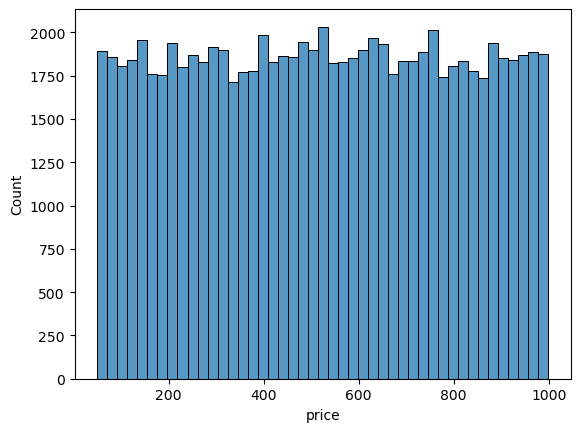

In [71]:
sns.histplot(df1['price'])
plt.show()

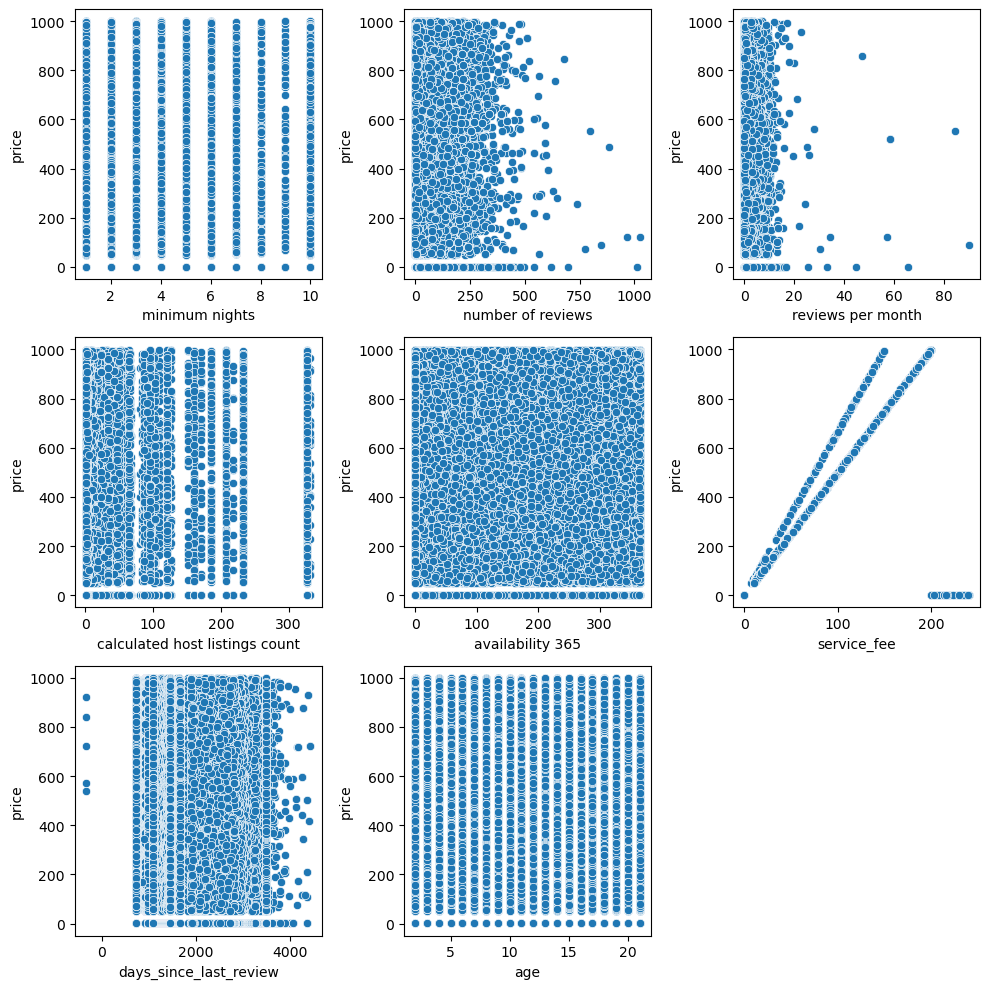

In [72]:
plt.figure(figsize=[10,10])
t=1
for i in num:
    plt.subplot(3,3,t)
    sns.scatterplot(x=df2[i], y=df2['price'])
    t+=1
plt.tight_layout()
plt.show()

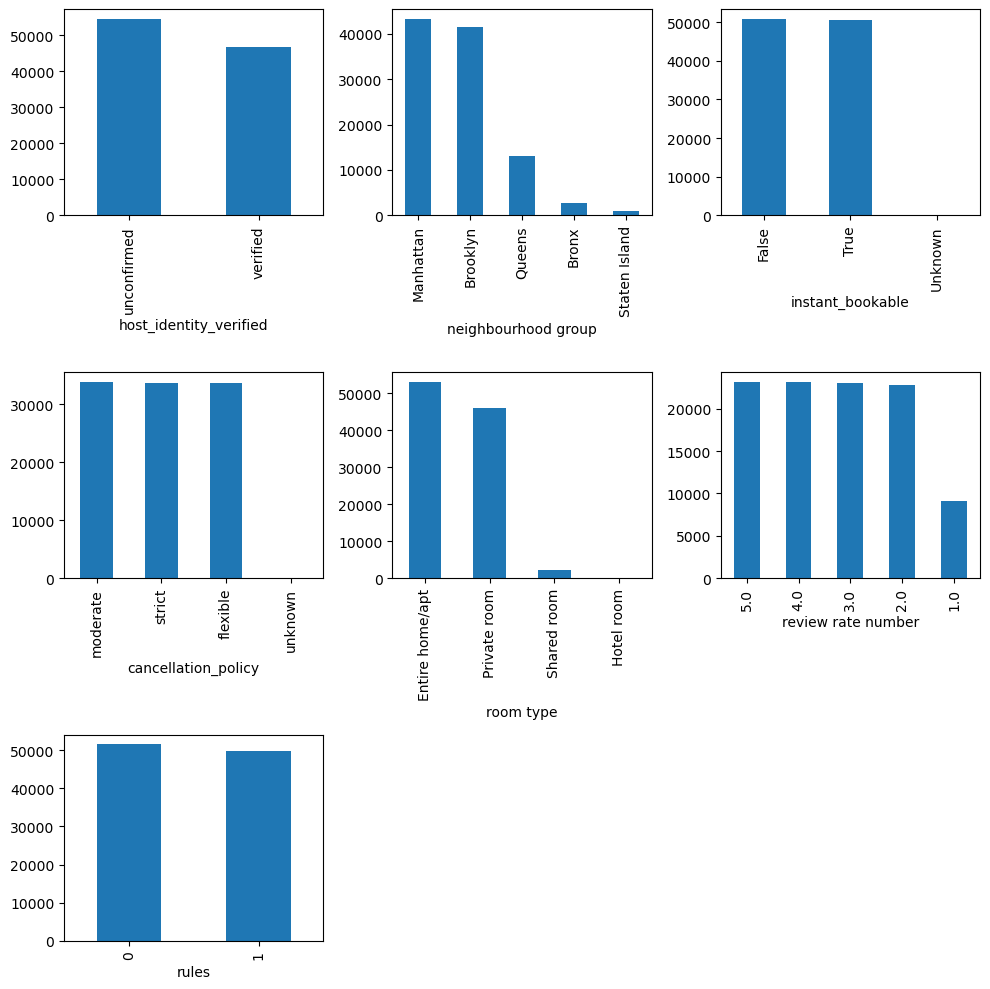

In [73]:
plt.figure(figsize=[10,10])
t=1
for i in cat:
    plt.subplot(3,3,t)
    df2[i].value_counts().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

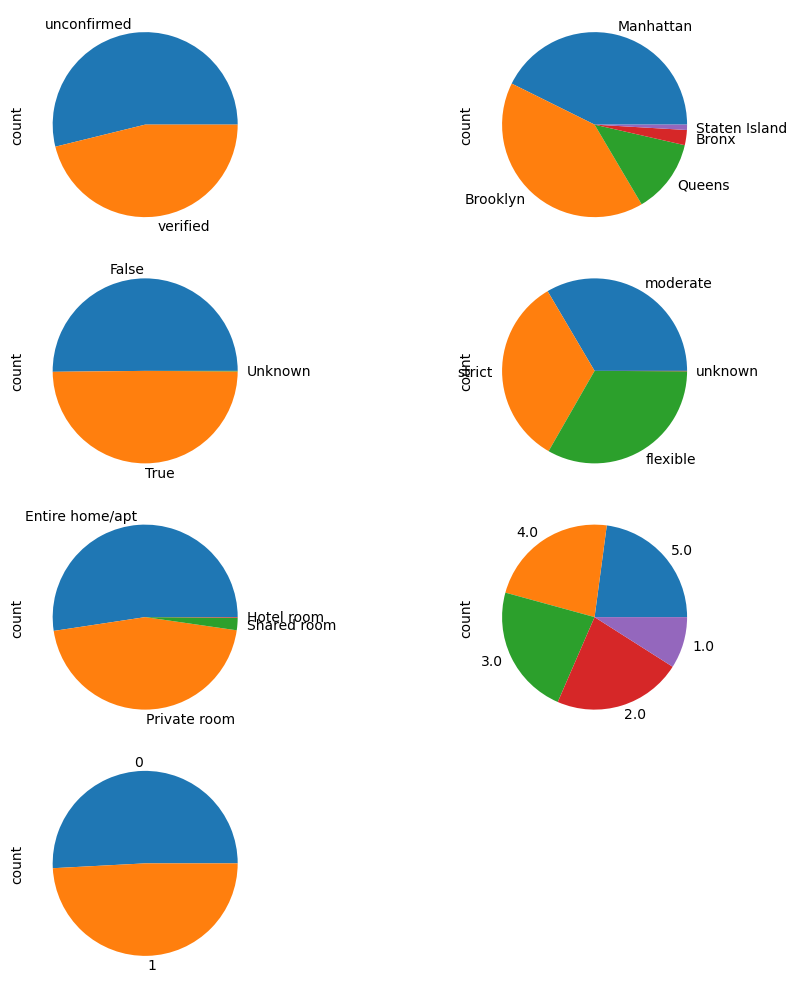

In [86]:
plt.figure(figsize=[10,10])
t=1
for i in cat:
    plt.subplot(4,2,t)
    df2[i].value_counts().plot(kind='pie')
    t+=1
plt.tight_layout()
plt.show()

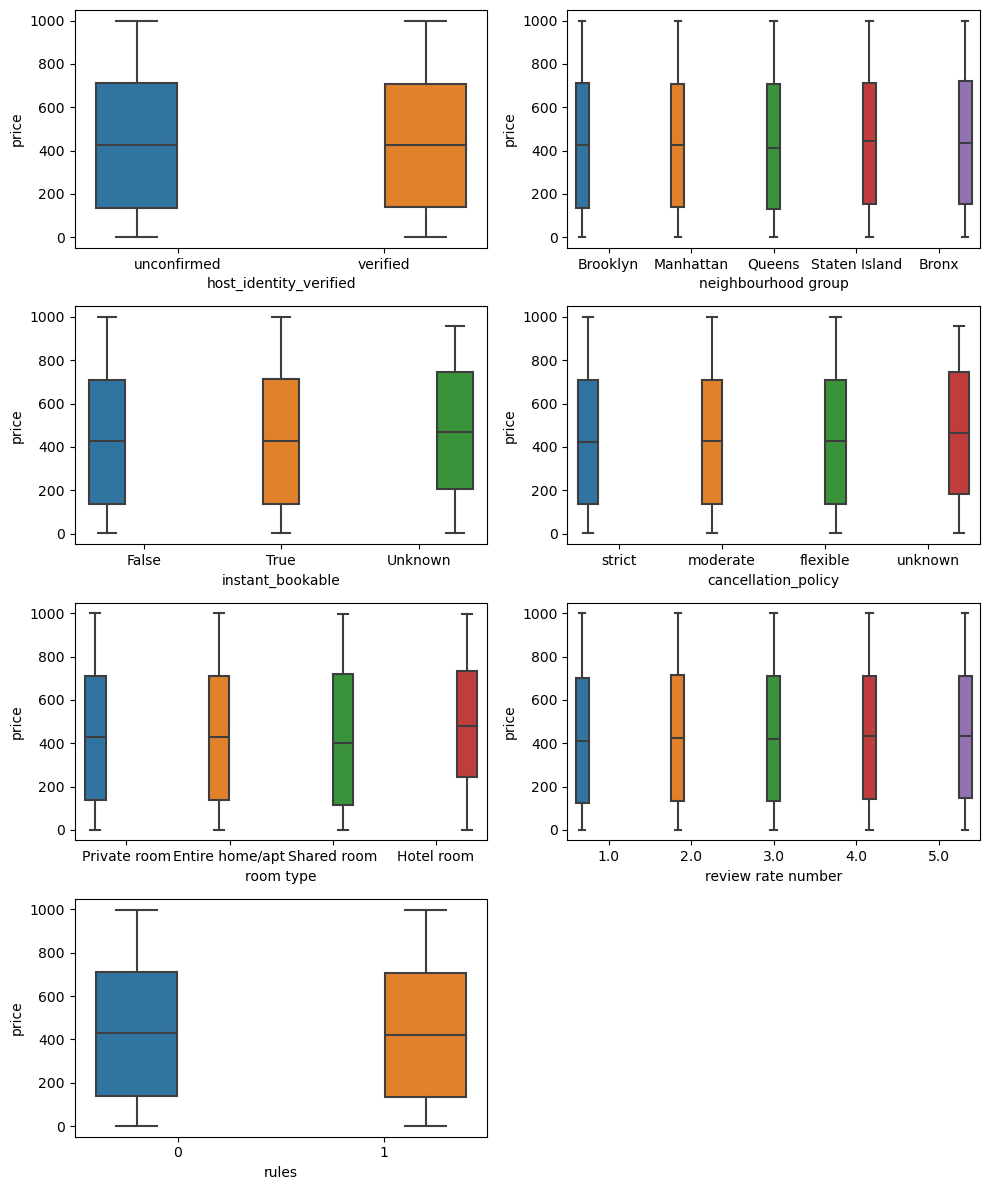

In [84]:
plt.figure(figsize=[10,12])
t=1
for i in cat:
    plt.subplot(4,2,t)
    sns.boxplot(x=df2[i], y=df2['price'], hue=df2[i])
    plt.legend().set_visible(False)
    t+=1
plt.tight_layout()
plt.show()

## Stats

In [75]:
from scipy.stats import *

In [76]:
for i in num:
    print('test result for', i, ':', mannwhitneyu(df2[i], df2['price']))

test result for minimum nights : MannwhitneyuResult(statistic=1576438935.5, pvalue=0.0)
test result for number of reviews : MannwhitneyuResult(statistic=1528584853.0, pvalue=0.0)
test result for reviews per month : MannwhitneyuResult(statistic=649820985.0, pvalue=0.0)
test result for calculated host listings count : MannwhitneyuResult(statistic=1271138498.0, pvalue=0.0)
test result for availability 365 : MannwhitneyuResult(statistic=2323535885.5, pvalue=0.0)
test result for service_fee : MannwhitneyuResult(statistic=2497633460.0, pvalue=0.0)
test result for days_since_last_review : MannwhitneyuResult(statistic=10139433518.5, pvalue=0.0)
test result for age : MannwhitneyuResult(statistic=1799353116.0, pvalue=0.0)


In [77]:
# Function to perform Kruskal-Wallis test for each categorical column
def kruskal_wallis(df, categorical_columns, numerical_column):
    results = {}
    
    for col in categorical_columns:
        groups = [df[numerical_column][df[col] == category].dropna() for category in df[col].unique()]
        stat, p_value = kruskal(*groups)
        results[col] = {'statistic': stat, 'p_value': p_value}
    
    return pd.DataFrame(results).T

kruskal_wallis(df2, cat, 'price')

,statistic,p_value
host_identity_verified,0.025628,0.872811
neighbourhood group,8.765941,0.067224
instant_bookable,1.389685,0.499153
cancellation_policy,0.680698,0.877734
room type,2.847996,0.415660
review rate number,15.453246,0.003848
rules,2.498132,0.113981


In [78]:
# Function to perform Chi-square tests between all pairs of categorical columns
def perform_chi2_tests(df, categorical_columns):
    chi2_results = {}

    for i, col1 in enumerate(categorical_columns):
        for col2 in categorical_columns[i+1:]:
            # Create a contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            
            # Perform the Chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Store the results
            chi2_results[f'{col1} vs {col2}'] = {'chi2_stat': chi2, 'p_value': p, 'dof': dof}
    
    return pd.DataFrame(chi2_results).T

chi2 = perform_chi2_tests(df2, cat)
chi2[chi2['p_value']<0.05]

,chi2_stat,p_value,dof
host_identity_verified vs neighbourhood group,41.348166,2.276672e-08,4.0
host_identity_verified vs room type,12.488035,5.885332e-03,3.0
host_identity_verified vs review rate number,30.122485,4.621304e-06,4.0
host_identity_verified vs rules,7.576322,5.913998e-03,1.0
neighbourhood group vs room type,2688.274178,0.000000e+00,12.0
neighbourhood group vs review rate number,161.764494,3.669447e-26,16.0
neighbourhood group vs rules,181.101669,4.324487e-38,4.0
instant_bookable vs cancellation_policy,73171.114960,0.000000e+00,6.0
instant_bookable vs review rate number,15.810343,4.517655e-02,8.0
instant_bookable vs rules,6.471412,3.933243e-02,2.0


In [79]:
# Function to perform Spearman's Rank Correlation and Kendall's Tau
def perform_non_parametric_tests(df, numeric_columns, dependent_variable):
    results = {'Variable': [], 'Spearman Correlation': [], 'Spearman p-value': []}
    
    for col in numeric_columns:
        spearman_corr, spearman_p = spearmanr(df[col], df[dependent_variable])
        results['Variable'].append(col)
        results['Spearman Correlation'].append(spearman_corr)
        results['Spearman p-value'].append(spearman_p)
        
    return pd.DataFrame(results)

rankcorr = perform_non_parametric_tests(df2, num, 'price')
rankcorr

,Variable,Spearman Correlation,Spearman p-value
0,minimum nights,-0.001428,0.649356
1,number of reviews,0.000372,0.905584
2,reviews per month,-0.000704,0.822644
3,calculated host listings count,-0.003446,0.272505
4,availability 365,-0.002668,0.395480
5,service_fee,0.131307,0.000000
6,days_since_last_review,-0.004237,0.177288
7,age,0.001194,0.703755
